# Evaluation

reference : https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

In [1]:
import numpy as np
import logging
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array


In [2]:
temp_file = "./LDAmodel/conserv_25.model"
lda_model = LdaModel.load(temp_file)

In [3]:
f = open("new_conserv.txt", 'r', encoding = "UTF8")
# 데이터 받아옴
dataset = []
while True:
    line = f.readline()
    if not line: break
    dataset += [line.split(' ')]
f.close()

dct = Dictionary(dataset)
corpus = [dct.doc2bow(line) for line in dataset]

In [4]:
# Compute Coherence Score using c_v
coherence_model_lda_cv = CoherenceModel(model=lda_model, texts=dataset, dictionary=dct, coherence='c_v')
coherence_lda_cv = coherence_model_lda_cv.get_coherence()
print('\nCoherence Score_cv: ', coherence_lda_cv)



Coherence Score_cv:  0.37130363075637157


In [5]:
# Compute Coherence Score using UMass
coherence_model_lda_umass = CoherenceModel(model=lda_model, texts=dataset, dictionary=dct, coherence="u_mass")
coherence_lda_umass = coherence_model_lda_umass.get_coherence()
print('\nCoherence Score_umass: ', coherence_lda_umass)

#############################
# 논문 참고해서 다른 모델 정확도랑 비교하기
#http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.662.7267&rep=rep1&type=pdf

# u_mass에 대한 설명
# http://qpleple.com/topic-coherence-to-evaluate-topic-models/
############################


Coherence Score_umass:  -1.7807449941165883


In [6]:
# Save Coherence Score
f = open("log_CoherenceScore.txt", 'a')
result = list(map(str,["\n",temp_file, "c_v:", coherence_lda_cv, "u_mass:", coherence_lda_umass]))
f.write(" ".join(result))
f.close()

In [7]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
model_list, coherence_values = compute_coherence_values(dictionary=dct, corpus=corpus, texts=dataset, start=2, limit=40, step=6)

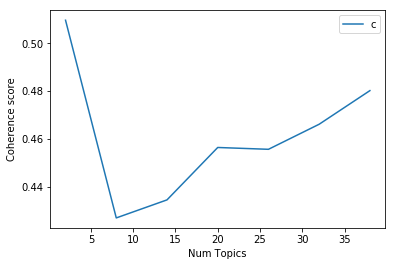

In [10]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

fig = plt.gcf()
plt.show()
fig.savefig('conserv_25.png')